In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [2]:
%cd /content/drive/MyDrive/uos/

/content/drive/MyDrive/uos




```
#F12 누르고 console 창에 복붙 후 런타임 재시작
function ClickConnect(){
    console.log("코랩 연결 끊김 방지"); 
    document.querySelector("colab-toolbar-button#connect").click() 
}
setInterval(ClickConnect, 60 * 1000)
```



In [3]:
#라이브러리 로드
import re
import json
import time
!sudo apt-get install g++ openjdk-8-jdk python3-dev python3-pip curl
!python3 -m pip install --upgrade pip
!python3 -m pip install konlpy       
!sudo apt-get install curl git
!bash <(curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh)
import konlpy
import gensim 
import glob, os
import requests
!pip install fasttext
import fasttext
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", 100)
import seaborn as sns
from glob import glob
import urllib.request
import matplotlib as mpl
from matplotlib import rc
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') 
from konlpy.tag import Mecab
mecab = Mecab()
from bs4 import BeautifulSoup
from tqdm.notebook import tqdm
from collections import Counter
import matplotlib.pyplot as plt
from PIL import Image, ImageFilter
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import matplotlib.font_manager as fm
from matplotlib import font_manager, rc
from wordcloud import ImageColorGenerator
from IPython.display import Image, display
from sklearn.metrics import silhouette_score
!pip install selenium
from selenium.webdriver.common.keys import Keys
from gensim.models import Word2Vec, FastText, Doc2Vec
from sklearn.metrics.pairwise import cosine_similarity
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import HoverTool, ColumnDataSource, value
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud, STOPWORDS as stopwords
from selenium.webdriver.common.action_chains import ActionChains
import warnings
warnings.filterwarnings(action='ignore')

Reading package lists... Done
Building dependency tree       
Reading state information... Done
curl is already the newest version (7.58.0-2ubuntu3.18).
g++ is already the newest version (4:7.4.0-1ubuntu2.3).
python3-dev is already the newest version (3.6.7-1~18.04).
openjdk-8-jdk is already the newest version (8u312-b07-0ubuntu1~18.04).
python3-pip is already the newest version (9.0.1-2.3~ubuntu1.18.04.5).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Reading package lists... Done
Building dependency tree       
Reading state information... Done
curl is already the newest version (7.58.0-2ubuntu3.18).
git is already the newest version 

/usr/local/lib/python3.7/dist-packages/requests/__init__.py:91: RequestsDependencyWarning: urllib3 (1.26.9) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 4 dirs
/usr/share/fonts/truetype/dejavu: caching, new cache contents: 22 fonts, 0 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/sh

In [4]:
#함수 정의

#형태소 분석 함수
def tokenized_mecab(data):
    result = re.sub('\n','', data)
    result = re.sub('\u200b','',result)
    result = re.sub('\xa0','',result)
    result = re.sub('([a-zA-Z])','',result)
    result = re.sub('[ㄱ-ㅎㅏ-ㅣ]+','',result)
    result = re.sub('[-=+,#/\?:^$.@*\"※~&%ㆍ!』\\‘|\(\)\[\]\<\>`\'…》]','',result)
    result = mecab.morphs(result)
    result = ' '.join(result)
    return result

#불용어 처리 함수
def out_stopwords(data, list_stopwords):
    data = data.split(" ")
    list_stopwords = list_stopwords
    data = [token for token in data if token not in list_stopwords]
    return data

#인풋 텍스트 벡터화 함수
def input2vec(user_input, stopword_list, word2vec_word_dict):
    tokenized_input = tokenized_mecab(user_input)
    tokenized_input_outStopwords = out_stopwords(tokenized_input, stopword_list)
    
    list_vector = []
    for word in tokenized_input_outStopwords:
        if word in word_dict.keys():
            list_vector.append(word_dict[word])
    user_vector = (np.sum(list_vector, axis=0) / len(list_vector)).tolist()
    return user_vector

#비슷한 강의 찾아주는 함수
def similar_lectures(user_vector, df_w2v):
  
  #강의별 유사도 top5
  similarity = {}
  for idx in df_w2v.index:
    sim = cosine_similarity(np.array(user_vector).reshape(1,-1), np.array([float(i) for i in df_w2v.loc[idx]['vector'][1:-1].split(', ')]).reshape(1,-1))
    similarity[str(df_w2v.loc[idx]['교과번호'])] = float(sim)
    similarity = {key: value for key, value in sorted(similarity.items(), key=lambda item: item[1], reverse=True)}
    rating = [key for key, value in sorted(similarity.items(), key=lambda item: item[1], reverse=True)]
    top_5 = rating[:5]
  
  #top5 강의 및 확률 반환 
  result = {}
  for i in top_5:
      result[i] = str(abs(round((similarity[i]*100), 2))) + "%"

  return result

#비슷한 강의평 찾아주는 함수
def similar_reviews(user_vector, df_w2v, lec_ids):
  lectures = {}
  #top5 강의에 대해서 반복
  for id_ in tqdm(lec_ids):
    lec_name = df_w2v[df_w2v['교과번호']==id_]['강의명'].iloc[0]
    lec_reviews = df_w2v[df_w2v['강의명'].str.contains(lec_name)]['리뷰내용'].values
    #강의리뷰 유사도 계산
    similarity = {}
    for review in lec_reviews: 
      sim = cosine_similarity(np.array(user_vector).reshape(1,-1), np.array([float(i) for i in df_w2v[df_w2v.리뷰내용==review].iloc[0]['vector'][1:-1].split(', ')]).reshape(1,-1))
      similarity[df_w2v[df_w2v['리뷰내용']==review]['리뷰내용'].iloc[0]] = float(sim)
    similarity = {key: value for key, value in sorted(similarity.items(), key=lambda item: item[1], reverse=True)}
    rating = [str(key) for key, value in sorted(similarity.items(), key=lambda item: item[1], reverse=True)]
    top_3 = rating[:3]
    #가장 유사한 top3 리뷰 확인
    result = {}
    for i in top_3:
        result[i] = str(abs(round((similarity[i]*100), 2))) + "%"
    lectures[id_] = result
  return lectures

#추천 강의 정보를 제공하는 함수
def show_infos(dict_lec_rev, df_w2v):
  result = []
  for lec_id in dict_lec_rev:
    name = df_w2v[df_w2v['교과번호'] == lec_id]['강의명'].iloc[0]
    for rev_id in list(dict_lec_rev[lec_id]):
      dict_temp = {}
      dict_temp['강의명'] = name
      dict_temp['교수명'] = df_w2v[df_w2v['리뷰내용']==rev_id]['교수명'].iloc[0]
      dict_temp['키워드'] = df_w2v[df_w2v['리뷰내용']==rev_id]['키워드'].iloc[0]
      dict_temp['TOP3리뷰'] = df_w2v[df_w2v['리뷰내용']==rev_id]['리뷰내용'].iloc[0]
      result.append(dict_temp)
  return result

### __1. 단어벡터 생성__
* 강의평에 있는 단어들을 word2vec으로 학습하여 단어 벡터 생성

In [5]:
#데이터 로드
df = pd.read_csv('에브리타임_크롤링_키워드.csv')

In [6]:
#형태소 분석
df['tokenized'] = df['리뷰내용'].apply(tokenized_mecab)
df[['tokenized']].head(5)

,tokenized
0,영어 잘 하 시 면 성적 잘 받 을 수 있 습니당 토플 라이팅 29 점 기준
1,교수 님 강의 력 은 정말 뛰어나 시 고 질문 도 잘 받 아 주 심 그런데 매주 문...
2,우선 교수 님 너무 친절 하 시 고 좋 으세요 최고
3,매 수업 시간 마다 편하 게 다가오 려 하 시 고 수업 자체 도 열정 넘치 게 하 ...
4,교수 님 정말 좋 으시 고 이 수업 을 통해서 많 은 걸 배울 수 있 다고 생각 합...


In [7]:
#불용어 처리
def out_stopwords(data, list_stopwords):
    data = data.split(" ")
    list_stopwords = list_stopwords
    data = [token for token in data if token not in list_stopwords]
    return data

stopwords = list(open('stopwords.txt', 'r'))
list_stopwords = [] 
for stopword in stopwords:
  list_stopwords.append(stopword)

word_list = []
df['cleared'] = df['tokenized'].apply(lambda x: out_stopwords(x, list_stopwords=list_stopwords))
for i in df['cleared']:
  tmp = ','.join(i)
  word_list.append(tmp)

df['cleared2'] = word_list
df[['cleared2']].head(5)

,cleared2
0,"영어,잘,하,시,면,성적,잘,받,을,수,있,습니당,토플,라이팅,29,점,기준"
1,"교수,님,강의,력,은,정말,뛰어나,시,고,질문,도,잘,받,아,주,심,그런데,매주,문..."
2,"우선,교수,님,너무,친절,하,시,고,좋,으세요,최고"
3,"매,수업,시간,마다,편하,게,다가오,려,하,시,고,수업,자체,도,열정,넘치,게,하,..."
4,"교수,님,정말,좋,으시,고,이,수업,을,통해서,많,은,걸,배울,수,있,다고,생각,합..."


In [8]:
#corpus 저장
tokenized = ''
for content in df['cleared2'].values:
    tokenized = tokenized + "{} \n".format(content)

f = open("corpus ver1.0 (전체, stopword 제거).txt", 'w')
f.write(tokenized)
f.close()

In [9]:
#corpus 확인
direc ='corpus ver1.0 (전체, stopword 제거).txt'
corpus = [sent.strip().split(",") for sent in open(direc).readlines()]
corpus[:5]

[['영어',
  '잘',
  '하',
  '시',
  '면',
  '성적',
  '잘',
  '받',
  '을',
  '수',
  '있',
  '습니당',
  '토플',
  '라이팅',
  '29',
  '점',
  '기준'],
 ['교수',
  '님',
  '강의',
  '력',
  '은',
  '정말',
  '뛰어나',
  '시',
  '고',
  '질문',
  '도',
  '잘',
  '받',
  '아',
  '주',
  '심',
  '그런데',
  '매주',
  '문제',
  '풀',
  '어',
  '오',
  '는',
  '숙제',
  '랑',
  '수시로',
  '내',
  '시',
  '는',
  '과제',
  '때문',
  '에',
  '힘들',
  '수',
  '도',
  '있',
  '음',
  '자신',
  '의',
  '영어',
  '문장력',
  '을',
  '기르',
  '고',
  '싶',
  '다면',
  '추천',
  '학점',
  '도',
  '나쁘',
  '지',
  '않',
  '게',
  '잘',
  '주심'],
 ['우선', '교수', '님', '너무', '친절', '하', '시', '고', '좋', '으세요', '최고'],
 ['매',
  '수업',
  '시간',
  '마다',
  '편하',
  '게',
  '다가오',
  '려',
  '하',
  '시',
  '고',
  '수업',
  '자체',
  '도',
  '열정',
  '넘치',
  '게',
  '하',
  '셔서',
  '너무',
  '좋',
  '았',
  '다',
  '시험',
  '은',
  '안',
  '봤',
  '고',
  '과제',
  '대체로',
  '에세이',
  '쓰',
  '기',
  '를',
  '했',
  '다',
  '피드백',
  '도',
  '너무',
  '잘',
  '주',
  '시',
  '고',
  '학점',
  '도',
  '잘',
  '주',
  '신다'],
 ['교수',
  '님',
  '정말',
  '좋',
  '으

In [10]:
#word2vec 학습
w2v_model = Word2Vec(corpus, size=100, window=5, min_count=5,  
                     workers=12, iter=1000, hs=0, sg=1)

In [ ]:
#모델 확인
w2v_model.wv.index2word

In [12]:
#모델 저장
w2v_model.save('word2vec ver2.0 (iter1000).model')

In [80]:
#모델 테스트
print(w2v_model.wv.most_similar("강의"))
print(w2v_model.wv.most_similar('출석'))
print(w2v_model.wv.most_similar('시험'))

[('수업', 0.6504427194595337), ('력', 0.5523924231529236), ('교양', 0.5241245031356812), ('최고', 0.5012396574020386), ('강', 0.479482501745224), ('녹화', 0.4672567546367645), ('꿀', 0.4658520519733429), ('교수', 0.4610103964805603), ('좋', 0.4316251277923584), ('님', 0.4314761459827423)]
[('출결', 0.7296794652938843), ('퀴즈', 0.6649454832077026), ('체크', 0.6157299280166626), ('첵', 0.534095287322998), ('지각', 0.5231484770774841), ('부르', 0.5141980051994324), ('제출', 0.5022611618041992), ('출', 0.49202483892440796), ('전자', 0.4894554018974304), ('과제', 0.47976958751678467)]
[('기말', 0.669050931930542), ('기말고사', 0.6347283720970154), ('중간고사', 0.5775338411331177), ('중간', 0.5753750801086426), ('객관식', 0.5752114057540894), ('기말시험', 0.5670396089553833), ('주관식', 0.5670047998428345), ('오픈', 0.51472008228302), ('단답형', 0.5002543926239014), ('범위', 0.49514853954315186)]


### __2. 리뷰벡터 생성__
* 리뷰에 들어있는 단어들의 벡터를 전부 모아서 리뷰벡터 생성

In [49]:
#사전 생성
w2v_model = Word2Vec.load('word2vec ver1.0 (iter500).model')
word_dict = {}
for vocab in tqdm(w2v_model.wv.index2word):
    word_dict[vocab] = w2v_model.wv[vocab]

  0%|          | 0/3086 [00:00<?, ?it/s]

In [ ]:
#리뷰벡터 생성
dict_review_vector = {}
for idx in tqdm(df.index):
    list_vector = []
    for word in df.loc[idx]['cleared'].split():
        if word in word_dict.keys():
            list_vector.append(word_dict[word])
    dict_review_vector[df.loc[idx]['리뷰내용']] = np.sum(list_vector, axis=0).tolist()

df['vector'] = df['리뷰내용'].map(dict_review_vector)
df[['vector']].head(5)

  0%|          | 0/7186 [00:00<?, ?it/s]

,vector
0,"[0.37148723006248474, -0.1974397897720337, 1.0..."
1,"[3.085845708847046, -0.25097426772117615, 1.87..."
2,"[0.922540545463562, -0.7411057949066162, -1.83..."
3,"[2.0812458992004395, -0.09567178040742874, 1.5..."
4,"[3.8295540809631348, 1.352896809577942, 1.5570..."


### __3. 강의벡터 생성__
* 리뷰벡터들을 더하여/평균내어 강의벡터 생성

In [ ]:
#강의벡터 생성
dict_lecture_vector = {}
for idx in tqdm(df.index):
    list_vector = []
    for word in df.loc[idx]['cleared'].split():
        if word in word_dict.keys():
            list_vector.append(word_dict[word])
    dict_lecture_vector[df.loc[idx]['교과번호']] = np.sum(list_vector, axis=0).tolist()

df['vector2'] = df['교과번호'].map(dict_lecture_vector)
df[['vector2']].head(5)

  0%|          | 0/7186 [00:00<?, ?it/s]

,vector2
0,"[12.018617630004883, 29.162105560302734, 15.53..."
1,"[12.018617630004883, 29.162105560302734, 15.53..."
2,"[12.018617630004883, 29.162105560302734, 15.53..."
3,"[12.018617630004883, 29.162105560302734, 15.53..."
4,"[12.018617630004883, 29.162105560302734, 15.53..."


In [ ]:
def for_mean_vector(df):
  return np.array(df['vector2'])/df['리뷰수']

df['vector3'] = df.apply(for_mean_vector, axis=1)
df[['vector3']].head(5)

,vector3
0,"[2.003102938334147, 4.860350926717122, 2.58964..."
1,"[2.003102938334147, 4.860350926717122, 2.58964..."
2,"[2.003102938334147, 4.860350926717122, 2.58964..."
3,"[2.003102938334147, 4.860350926717122, 2.58964..."
4,"[2.003102938334147, 4.860350926717122, 2.58964..."


In [ ]:
#최종 저장 
df.to_csv('에브리타임_크롤링_w2v.csv', encoding='utf-8-sig', index=False)

### __4. EDA__

In [14]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2)

In [ ]:
#only vector dataset 생성
col_names=[i for i in range(100)]
tmp_df = pd.DataFrame()
tmp_df = tmp_df.reindex(columns=col_names)
vec_df = df[['교과번호', '강의명', '교수명']]
vec_df = pd.concat([vec_df, tmp_df], axis=1)
for i, vector in enumerate(df['vector2']):
  for j, v in enumerate(vector):
    vec_df.iloc[i, j+3] = v

In [ ]:
#저장
vec_df = vec_df.groupby('교과번호').mean().reset_index(drop=False)
vec_df.to_csv('에브리타임_크롤링_vec.csv', encoding='utf-8-sig', index=False)

In [15]:
#로드
vec_df = pd.read_csv('에브리타임_크롤링_vec.csv')
vec_df.head(2)

,교과번호,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,...,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99
0,01033-01,5.011274,17.339224,5.537165,10.445046,-0.876184,-3.282123,28.311625,7.444604,-3.280041,-1.218253,-9.555893,-14.334479,8.148088,29.514347,-2.770438,5.933638,-41.700558,4.638901,16.870638,-24.036488,3.504684,2.946786,5.674059,9.932839,9.844889,-4.048973,-34.934071,-5.069117,-6.100270,1.345012,13.190162,-2.317113,10.163281,-6.941576,6.190737,7.697492,15.757554,-16.881897,-10.541118,5.678380,-3.076191,0.646569,-14.616548,22.447405,7.864541,13.252946,-13.051115,-21.048000,-5.812580,...,-13.337814,29.408434,10.350960,-12.526819,12.266792,-24.533684,0.799986,-9.540685,-1.741821,25.040701,-1.296029,13.393168,25.301311,11.229759,-12.734127,10.658101,-0.811867,-15.41734,-2.847915,9.192169,-24.757498,24.546066,-11.828754,4.105283,1.140926,2.824702,15.998688,15.888438,0.379110,25.640219,10.825500,6.866171,-11.270114,16.397152,22.376272,31.353617,0.563532,-1.928542,10.757654,2.264352,0.897866,-29.889605,-17.247360,-7.451191,-12.615042,29.460220,-13.567346,14.439029,21.212097,-5.531982
1,01034-01,0.511973,6.133722,7.845802,2.866873,5.462456,-2.063612,19.313803,7.804368,-4.876734,-1.090793,-5.143592,-8.773828,5.969651,16.437824,1.505297,0.029485,-19.913431,-1.842615,12.232365,-14.935997,-1.643859,-2.997650,-4.721785,-0.018604,7.743120,-2.783501,-18.242910,-6.326100,-1.393633,3.864639,4.726782,0.014237,6.157160,-4.906339,8.105665,9.875642,6.280742,-11.477015,-9.491747,13.020915,-2.432910,6.245604,-3.062511,13.356408,10.640697,6.412369,-14.997463,-9.010783,-1.639721,...,-11.295991,17.012169,9.053092,-3.854687,0.473659,-7.719230,-0.408459,-4.667802,0.433874,9.544967,-9.225126,7.733141,14.314774,12.784307,-6.828684,7.503572,-1.566589,-9.04582,-10.536608,9.375420,-16.086290,8.746987,-3.050492,-0.490492,4.129385,2.156756,8.466364,2.719613,8.530912,15.532649,11.647773,1.641664,-9.013660,3.879997,18.123158,21.642725,0.862783,-4.101775,0.528056,-1.541866,-1.238184,-13.131357,-18.493164,2.213323,-9.870128,10.731389,-13.942013,4.348477,9.398346,-8.025380


In [16]:
#2차원 축소
lecture_tsne = tsne.fit_transform(vec_df.iloc[:, 1:])
lec_df = pd.DataFrame(lecture_tsne, index=vec_df['교과번호'].tolist(), columns=['x', 'y']).reset_index()
lec_df.head()

,index,x,y
0,01033-01,7.904090,0.268844
1,01034-01,4.170717,-0.713167
2,01035-01,-7.800597,-2.025708
3,01091-01,-6.075416,-1.725595
4,01092-01,-11.006075,-2.866262


In [ ]:
#데이터 병합
my_df = df.groupby(['교과번호', '강의명', '교수명']).count().reset_index().iloc[:, :3]
lec_df = pd.merge(lec_df, my_df, how='left', left_on='index', right_on='교과번호').drop(columns='교과번호')

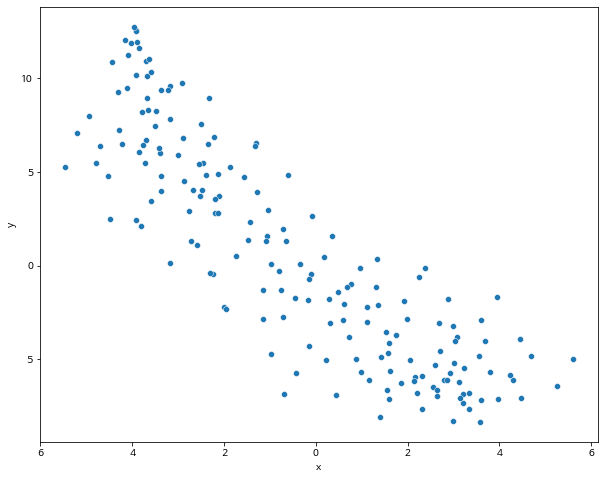

In [ ]:
#2차원 시각화
fig, ax = plt.subplots(figsize=(10, 8))
sns.scatterplot(ax=ax, data=lec_df, x="x", y="y")

In [ ]:
#저장
lec_df.to_csv('에브리타임_크롤링_xy.csv', encoding='utf-8-sig', index=False)

### __5. Clustering__

In [ ]:
#로드
import pandas as pd
df = pd.read_csv('에브리타임_크롤링_xy.csv')

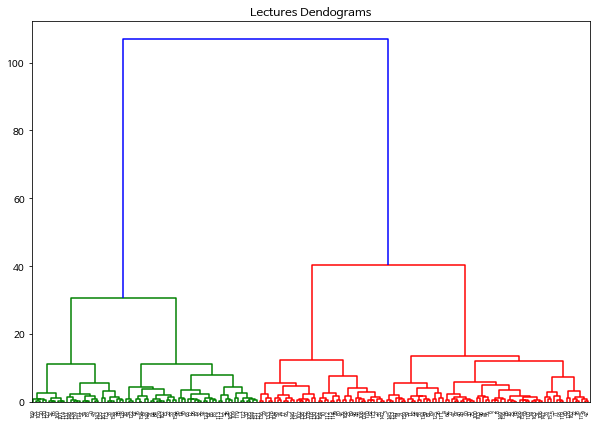

In [ ]:
#Hierarchical clustering 
import scipy.cluster.hierarchy as shc
data = df.iloc[:, 1:3].values  #nparray 형식으로 반환

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 7))
plt.title("Lectures Dendograms")
dend = shc.dendrogram(shc.linkage(data, method='ward'))    # dendrogram에서 적정 군집 수를 파악

In [ ]:
#Silhouette 분석 
range_n_clusters = range(7, 15)

for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters,
                       max_iter=1000,
                       n_init=10)
    preds = clusterer.fit_predict(df[['x','y']])
    centers = clusterer.cluster_centers_

    score = silhouette_score(df[['x','y']], preds)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, round(score, 4)))

For n_clusters = 7, silhouette score is 0.4066
For n_clusters = 8, silhouette score is 0.3924
For n_clusters = 9, silhouette score is 0.3742
For n_clusters = 10, silhouette score is 0.3539
For n_clusters = 11, silhouette score is 0.3572
For n_clusters = 12, silhouette score is 0.3481
For n_clusters = 13, silhouette score is 0.3489
For n_clusters = 14, silhouette score is 0.3538


In [ ]:
#K-Means 클러스터링
model = KMeans(n_clusters=7)
model.fit(df[['x','y']])
y_predict = model.fit_predict(df[['x','y']])
df['cluster'] = y_predict

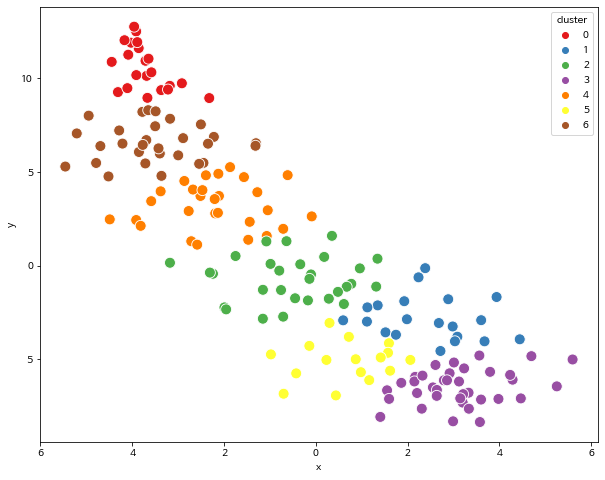

In [ ]:
#시각화
fig, ax = plt.subplots(figsize=(10, 8))
sns.scatterplot(ax=ax, 
                data=df, 
                x="x", 
                y="y",
                hue='cluster', 
                palette='Set1', 
                s=120)

In [ ]:
#저장
#df.to_csv('에브리타임_크롤링_cluster.csv', encoding='utf-8-sig', index=False)

#로드
df_w = pd.read_csv('에브리타임_크롤링_w2v.csv')
df_c = pd.read_csv('에브리타임_크롤링_cluster.csv')

In [ ]:
df_c

,index,x,y,강의명,교수명,cluster
0,01033-01,-3.662764,8.954203,한문,유정열,3
1,01034-01,-2.443146,5.481142,독일어,최은녕,1
2,01035-01,3.009887,-5.177002,불어,류은영,5
3,01091-01,1.594994,-4.144914,철학의이해,차건희,6
4,01092-01,3.575121,-8.355539,논리와사고,최승락,0
...,...,...,...,...,...,...
175,01911-01,3.602674,-2.917536,인문사회계를위한파이썬,김인철,5
176,01915-01,-2.303209,-0.375956,인공지능기초와활용,이종환,2
177,01916-01,0.484975,-1.404780,인공지능수학1,정덕종,2
178,01918-01,-0.706542,1.960916,데이터분석기초,정덕종,4


In [ ]:
#불용어 리스트 정의
stopwords = ['바로', '채우', '어서', '습니다', '으로',
             '지만', '많이', '수업', '습니당', '아서']

#클러스터별 워드클라우드
for num in list(range(0, df_c['cluster'].nunique())):
  cluster_num = num
  print("cluster", cluster_num, "시작","*"*50 )

  # cluster 내 리뷰들 모아주기
  list_collect_ids = []
  for senator in df_c[df_c['cluster']==cluster_num]['index'].tolist():          
    list_collect_ids.extend(df_w['강의명'].values)
  print("cluster 내 리뷰 수: ", len(set(list_collect_ids)), '강의 수', len(df_c[df_c['cluster']==cluster_num]))

  # 강의별 리뷰들 모아주기
  word_bags_cluster = ''
  for i in Counter(list_collect_ids).most_common(round(len(set(list_collect_ids))/20)):
    corpus = df_w[df_w['강의명']==i[0]]['cleared'].iloc[0]
    word_bags_cluster = word_bags_cluster + corpus

  # wordcloud 만들기
  wc = WordCloud(background_color = "white",
                 font_path = "/content/drive/MyDrive/NanumSquareB.ttf",
                 colormap = 'Set2',
                 collocations = True, 
                 stopwords = stopwords)
                 #mask = mask_array)

  # WordCloud 출력하기
  wc.generate(word_bags_cluster)
  wc.to_image()

  # wordcloud 저장하기
  wc.to_file('cluster_{} ver1.0 5%.png'.format(cluster_num))

cluster 0 시작 **************************************************
cluster 내 리뷰 수:  139 강의 수 32
cluster 1 시작 **************************************************
cluster 내 리뷰 수:  139 강의 수 33
cluster 2 시작 **************************************************
cluster 내 리뷰 수:  139 강의 수 32
cluster 3 시작 **************************************************
cluster 내 리뷰 수:  139 강의 수 22
cluster 4 시작 **************************************************
cluster 내 리뷰 수:  139 강의 수 29
cluster 5 시작 **************************************************
cluster 내 리뷰 수:  139 강의 수 17
cluster 6 시작 **************************************************
cluster 내 리뷰 수:  139 강의 수 15


### __6. Recommendation__

In [22]:
#데이터 로드
import pandas as pd
df_w2v = pd.read_csv('에브리타임_크롤링_w2v.csv') #7186 rows × 28 columns
df_vec = pd.read_csv('에브리타임_크롤링_vec.csv') #180 rows × 101 columns
df_clus = pd.read_csv('에브리타임_크롤링_cluster.csv') #180 rows × 6 column
df_final = pd.read_csv('에브리타임_크롤링_최종.csv') ##7186 rows × 21 columns
print(df_w2v.shape, df_vec.shape, df_clus.shape, df_final.shape)

(7186, 28) (180, 101) (180, 6) (7186, 21)


In [67]:
#최종 추천 함수 정의
def lecture_recommendation(user_input):

  #list_stopword
  stopwords = list(open('stopwords.txt', 'r'))
  list_stopwords = [] 
  for stopword in stopwords:
    list_stopwords.append(stopword)

  #word_dict
  w2v_model = Word2Vec.load('word2vec ver1.0 (iter500).model')
  word_dict = {}
  for vocab in tqdm(w2v_model.wv.index2word):
      word_dict[vocab] = w2v_model.wv[vocab]

  #recommendation
  user_vector = input2vec(user_input, list_stopwords, word_dict)
  dict_lec = similar_lectures(user_vector, df_w2v)
  dict_lec_rev = similar_reviews(user_vector, df_w2v, dict_lec)
  lec_rev_info = show_infos(dict_lec_rev, df_w2v)
  res_short = pd.DataFrame(lec_rev_info)

  #return
  res_long = pd.DataFrame()
  for i in range(5):
    lec_no = list(dict_lec_rev.items())[i][0]
    tmp = df_final[df_final['교과번호']==lec_no]
    res_long = pd.concat([res_long, tmp]).reset_index(drop=True)

  return res_short, res_long

### 예시1

In [74]:
res_short, res_long = lecture_recommendation('교수님 강의력이 좋고 열정적인 분이면 좋겠어요!')

  0%|          | 0/3086 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

In [75]:
res_short 

,강의명,교수명,키워드,TOP3리뷰
0,화학및실험1,조대행,"['강의', '공부', '과제', '교수', '내용']",내용이 많이 쉽긴 하지만 교수님 강의력이 무난해서 이럭저럭 재미있게 들음
1,화학및실험1,권해두,"['개인', '공부', '과제', '교수', '기말']",진짜 권해두 교수님 너무 좋습니다. 근데 실험 윤미경 교수님이 좀 빡세게 채점하시는...
2,화학및실험1,윤미경,"['강의', '공부', '과제', '교수', '기말']",교수님이 열정적이시고 전달력이 좋으십니다\n그것과는 별계로 좀 깐깐하십니다\n시험도...
3,물리학및실험1,유병덕,"['교과', '교수', '기말', '내용', '레포']",출석은 직접 호명하시는데 교수님이 부르시고 싶으신 날과 시간에 부르세요... 시험은...
4,물리학및실험1,김민아,"['강의', '고등', '공부', '과목', '과제']",시험을 말아 먹었지만 보고서라도 열심히 작성했더니 B+…\n교수님 강의력도 괜찮으시...
5,물리학및실험1,이나영,"['강의', '강추', '고등', '공부', '과목']",교수님 강의력이 너무 좋으시고 친절하게 가르쳐주심\n1학년 수업이라 애들이 좀 떠드...
6,스포츠산업과스포츠마케팅,김성규,"['강의', '개꿀', '개인', '경기', '공부']",운동 좋아하시면 꼭 들으세요 내년에 수업 방식이 어떨진 모르겠지만 비대면이면 정말 ...
7,스포츠산업과스포츠마케팅,김성규,"['강의', '개꿀', '개인', '경기', '공부']",꿀꿀꿀꿀강의~\n짱인강의입니다 교수님도 너무 좋습니다
8,스포츠산업과스포츠마케팅,김성규,"['강의', '개꿀', '개인', '경기', '공부']",스포츠를 좋아한다면 꼭 들으세요. 교수님 친절하시고 강의 내용도 적어요! 점수 잘받...
9,현대행정과법의체계,최윤영,"['강의', '개인', '걱정', '공부', '과목']",교수님 정말 친절하시고 강의력도 좋아요! 다만 나긋나긋하셔서 중간중간 졸았던 적도 ...


In [73]:
res_long 

,강의명,교수명,학년,교과번호,학점,강의시간,강의유형,담은인원,정원,링크,개설학기,평균평점,과제,조모임,성적,출결,시험,유저평점,수강학기,리뷰내용,리뷰수
0,사회학에의초대,최가영,1.0,01236-01,3,"목06,07,08/15-118/119",교양선택,21,27,/lecture/view/1940569,"2022-1, 2021-2, 2021-1, 2020-2, 2020-1, 2019-1",2.96,많음,없음,보통,직접호명,2,4.0,21년 1학기 수강자,"장황한 설명때문에 지루하긴 하지만, 사회학에 대해 1도 모르던 사람으로썬 나름 흥미...",26
1,사회학에의초대,최가영,1.0,01236-01,3,"목06,07,08/15-118/119",교양선택,21,27,/lecture/view/1940569,"2022-1, 2021-2, 2021-1, 2020-2, 2020-1, 2019-1",2.96,많음,없음,보통,직접호명,2,3.0,20년 2학기 수강자,"빡세게 들을 수 있는 교양.. 토론, 발표 다 하고 질문 점수도 있어서 부담스러울 ...",26
2,사회학에의초대,최가영,1.0,01236-01,3,"목06,07,08/15-118/119",교양선택,21,27,/lecture/view/1940569,"2022-1, 2021-2, 2021-1, 2020-2, 2020-1, 2019-1",2.96,많음,없음,보통,직접호명,2,1.0,21년 1학기 수강자,수업에서 매주 과제를 내주십니다 그리고 기말 발표를 하는데 준비할때 부담이 꽤 됩니...,26
3,사회학에의초대,최가영,1.0,01236-01,3,"목06,07,08/15-118/119",교양선택,21,27,/lecture/view/1940569,"2022-1, 2021-2, 2021-1, 2020-2, 2020-1, 2019-1",2.96,많음,없음,보통,직접호명,2,4.0,21년 1학기 수강자,"줌으로 수업. 개인적으로 사회학에 관심이 많아서 정말 재미있었고, 교수님 강의력도 ...",26
4,사회학에의초대,최가영,1.0,01236-01,3,"목06,07,08/15-118/119",교양선택,21,27,/lecture/view/1940569,"2022-1, 2021-2, 2021-1, 2020-2, 2020-1, 2019-1",2.96,많음,없음,보통,직접호명,2,1.0,21년 1학기 수강자,교수님 강의력도 좋지 않고 매주 뭘 해야함 3학점 교양이 아닌 전공보다 빡센듯하게 ...,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,화학및실험1,윤미경,1.0,01110-08,4,"월03/4-120/121, 화07,08/4-120/121, 수06,07/4-104",교양선택,36,0,/lecture/view/1775958,"2022-1, 2021-1, 2020-1, 2019-1, 2018-1",3.95,보통,없음,깐깐함,직접호명,2,3.0,19년 1학기 수강자,깐깐하신 분임..\n시험 난이도 꽤 어렵고 시간부족해서 투자많이하세요ㅠㅜ,22
150,화학및실험1,윤미경,1.0,01110-08,4,"월03/4-120/121, 화07,08/4-120/121, 수06,07/4-104",교양선택,36,0,/lecture/view/1775958,"2022-1, 2021-1, 2020-1, 2019-1, 2018-1",3.95,보통,없음,깐깐함,직접호명,2,4.0,19년 1학기 수강자,만족함. 교수님이 살짝 깐깐하시고 인정사정없는 면도 다소있음. 그래도 수업자채는 괜...,22
151,화학및실험1,윤미경,1.0,01110-08,4,"월03/4-120/121, 화07,08/4-120/121, 수06,07/4-104",교양선택,36,0,/lecture/view/1775958,"2022-1, 2021-1, 2020-1, 2019-1, 2018-1",3.95,보통,없음,깐깐함,직접호명,2,3.0,19년 1학기 수강자,좋으신데 조금 깐깐.. 강의력도 좋으신데 약간 까칠? 하신편 시험도 만만치 않아서 ...,22
152,화학및실험1,윤미경,1.0,01110-08,4,"월03/4-120/121, 화07,08/4-120/121, 수06,07/4-104",교양선택,36,0,/lecture/view/1775958,"2022-1, 2021-1, 2020-1, 2019-1, 2018-1",3.95,보통,없음,깐깐함,직접호명,2,4.0,18년 1학기 수강자,교수님이 열정적이시고 전달력이 좋으십니다\n그것과는 별계로 좀 깐깐하십니다\n시험도...,22


### 예시2

In [68]:
res_short, res_long = lecture_recommendation('학점을 잘 주는 꿀강의를 원합니다.')

  0%|          | 0/3086 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

In [69]:
res_short 

,강의명,교수명,키워드,TOP3리뷰
0,시민의자유와헌법,남정아,"['감상', '강의', '개인', '객관식', '거부']",전 좋았습니다. 교수님이 비율을 꽉꽉 채워주셔서 그런지 학점받기가 수월한것 같습니다...
1,시민의자유와헌법,남정아,"['감상', '강의', '개인', '객관식', '거부']",수업 잘 듣고 사례 잘 보면 좋은 성적 받을 수 있어요.\n법 잘 모르는데도 좋은 ...
2,시민의자유와헌법,남정아,"['감상', '강의', '개인', '객관식', '거부']",교수님이 학생배려를 잘해주심. 일단 학점을 잘주시기때문에 불만 전혀없는수업.
3,물리학및실험1,남윤성,"['강의', '공부', '과제', '교수', '기말']",수업을 재밌게 하려고 노력은 하시지만 ㅠㅠ 잘 모르겠다 물리 노베라는 가정하에 수업...
4,물리학및실험1,김민아,"['강의', '고등', '공부', '과목', '과제']",다른교수님의 같은강의를 안들어봐서 상대적비교는 힘들지만 큰 장단점없이 무난합니다\n...
5,물리학및실험1,이나영,"['강의', '강추', '고등', '공부', '과목']",교수님\n친절하시고 이해도 쉽게 설명해주세요!\n제가 공부를 안해서 학점은 별로지만...
6,일반물리학및실습,이나영,"['강의', '공부', '교수', '기말', '레포']",교수님도 완전 친절하시고 모르는거 질문하면 친절하게 다 알려주심\n교수님이 물포자들...
7,일반물리학및실습,이나영,"['강의', '공부', '교수', '기말', '레포']",갓나영님! 학생들이 물리를 좋아하지도 잘하지도 않는다는 것을 알고계셔서 최대한 맞춰...
8,일반물리학및실습,이나영,"['강의', '공부', '교수', '기말', '레포']",교수님 너무 좋으세요..진짜 짱!!!! 제가 진짜 물리 못하고 시험도 매번 못봤는데...
9,문화속의사회,전인한,"['강의', '공부', '과제', '교수', '교양']",싸강 기준으로 작성해보자면 중간고사를 과제 3개로 대체하면서 거의 한달 넘게 과제에...


In [70]:
res_long

,강의명,교수명,학년,교과번호,학점,강의시간,강의유형,담은인원,정원,링크,개설학기,평균평점,과제,조모임,성적,출결,시험,유저평점,수강학기,리뷰내용,리뷰수
0,시민의자유와헌법,남정아,1.0,01289-01,3,"월08,09,10/20-207/208",교양선택,56,50,/lecture/view/1040639,"2022-1, 2021-2, 2021-1, 2020-2, 2020-1, 2018-1...",3.55,보통,없음,너그러움,직접호명,2,3.0,22년 1학기 수강자,헌법... 기본적으로 알고 있는 사람들에겐 제법 쉬운 강의 같습니다 정치와 법 공부...,164
1,시민의자유와헌법,남정아,1.0,01289-01,3,"월08,09,10/20-207/208",교양선택,56,50,/lecture/view/1040639,"2022-1, 2021-2, 2021-1, 2020-2, 2020-1, 2018-1...",3.55,보통,없음,너그러움,직접호명,2,3.0,22년 1학기 수강자,노베한텐 열심히 공부 안하면 어려움. 공부량이 너무 많음..,164
2,시민의자유와헌법,남정아,1.0,01289-01,3,"월08,09,10/20-207/208",교양선택,56,50,/lecture/view/1040639,"2022-1, 2021-2, 2021-1, 2020-2, 2020-1, 2018-1...",3.55,보통,없음,너그러움,직접호명,2,4.0,22년 1학기 수강자,나는 수험 헌법을 듣고 수업을 들어 따라오는 데 큰 무리가 없지만 강의가 쉽거나 내...,164
3,시민의자유와헌법,남정아,1.0,01289-01,3,"월08,09,10/20-207/208",교양선택,56,50,/lecture/view/1040639,"2022-1, 2021-2, 2021-1, 2020-2, 2020-1, 2018-1...",3.55,보통,없음,너그러움,직접호명,2,5.0,20년 2학기 수강자,꿀강 중의 꿀강 .. 학교 다니면서 꿀이라는 강의들 들어봤는데 그 중 제일 좋았음 ...,164
4,시민의자유와헌법,남정아,1.0,01289-01,3,"월08,09,10/20-207/208",교양선택,56,50,/lecture/view/1040639,"2022-1, 2021-2, 2021-1, 2020-2, 2020-1, 2018-1...",3.55,보통,없음,너그러움,직접호명,2,5.0,21년 2학기 수강자,"겨울계절학기로 수강했습니다. 과제 없이 시험만 2번 봤고, 중간은 서술형 기말은 객...",164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,회계의이해,박종찬,1.0,01441-01,3,"월02,03,04/33-B203",교양선택,177,180,/lecture/view/1616146,"2022-1, 2021-1, 2020-1, 2018-1, 2017-2, 2017-1",4.58,없음,없음,보통,지정좌석,2,5.0,17년 1학기 수강자,교수님의 강의력 좋습니다\n차근차근 친절히 알려주셔서 수업만 잘 따라가셔도 비쁠은 ...,146
361,회계의이해,박종찬,1.0,01441-01,3,"월02,03,04/33-B203",교양선택,177,180,/lecture/view/1616146,"2022-1, 2021-1, 2020-1, 2018-1, 2017-2, 2017-1",4.58,없음,없음,보통,지정좌석,2,4.0,17년 1학기 수강자,과제 없고 중간 기말만 있어서 진짜 말 그대로 알려주시는 공부만 하면 시험보고 학점...,146
362,회계의이해,박종찬,1.0,01441-01,3,"월02,03,04/33-B203",교양선택,177,180,/lecture/view/1616146,"2022-1, 2021-1, 2020-1, 2018-1, 2017-2, 2017-1",4.58,없음,없음,보통,지정좌석,2,3.0,17년 1학기 수강자,회계 자체가 문과인 나에게는 너무 어려운 과목이었다. 또한 재수강인지 고학년인지 모...,146
363,회계의이해,박종찬,1.0,01441-01,3,"월02,03,04/33-B203",교양선택,177,180,/lecture/view/1616146,"2022-1, 2021-1, 2020-1, 2018-1, 2017-2, 2017-1",4.58,없음,없음,보통,지정좌석,2,4.0,17년 1학기 수강자,우선 교수님이 설명을 개념부터 차근차근 잘해주시고 나름대로 위트도 있으셔서 재밌었어...,146


### 예시3

In [76]:
res_short, res_long = lecture_recommendation('교수님 강의력이 좋고 열정적인 분이면 좋겠고 학점을 잘 주는 꿀강의를 원합니다.')

  0%|          | 0/3086 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

In [77]:
res_short

,강의명,교수명,키워드,TOP3리뷰
0,현대물리학의이해,박경완,"['강의', '교수', '시험']",공대 2학년 이상의 학생이 아니면 듣는 걸 추천드리지 않습니다. 내용은 고등학교 물...
1,현대물리학의이해,박경완,"['강의', '교수', '시험']",교수님 좋으신 분이지만 강의력이 그렇게 좋은편은 아닙니다..\n기본적인 지식 없이는...
2,물리학및실험1,김민아,"['강의', '고등', '공부', '과목', '과제']",시험을 말아 먹었지만 보고서라도 열심히 작성했더니 B+…\n교수님 강의력도 괜찮으시...
3,물리학및실험1,유병덕,"['교과', '교수', '기말', '내용', '레포']",출석은 직접 호명하시는데 교수님이 부르시고 싶으신 날과 시간에 부르세요... 시험은...
4,물리학및실험1,이나영,"['강의', '강추', '고등', '공부', '과목']",교수님 강의력이 너무 좋으시고 친절하게 가르쳐주심\n1학년 수업이라 애들이 좀 떠드...
5,화학및실험1,권해두,"['개인', '공부', '과제', '교수', '기말']",진짜 권해두 교수님 너무 좋습니다. 근데 실험 윤미경 교수님이 좀 빡세게 채점하시는...
6,화학및실험1,윤미경,"['강의', '공부', '과제', '교수', '기말']",교수님이 열정적이시고 전달력이 좋으십니다\n그것과는 별계로 좀 깐깐하십니다\n시험도...
7,화학및실험1,조대행,"['강의', '공부', '과제', '교수', '내용']",내용이 많이 쉽긴 하지만 교수님 강의력이 무난해서 이럭저럭 재미있게 들음
8,현대행정과법의체계,최윤영,"['강의', '개인', '걱정', '공부', '과목']",교수님께서 정말 꼼꼼하게 설명해주신다. 시험 난이도도 적절했고 강의력이 정말 좋으심...
9,현대행정과법의체계,최윤영,"['강의', '개인', '걱정', '공부', '과목']",녹화강의 올려주시는데.. 시간을 잘 안 지키십니다ㅠ 내용이나 강의방식은 좋은데 예정...


In [78]:
res_long

,강의명,교수명,학년,교과번호,학점,강의시간,강의유형,담은인원,정원,링크,개설학기,평균평점,과제,조모임,성적,출결,시험,유저평점,수강학기,리뷰내용,리뷰수
0,현대물리학의이해,박경완,1.0,01377-01,3,"화06,07,08/14-112/113",교양선택,31,40,/lecture/view/2379707,2022-1,3.00,보통,없음,보통,혼용,2,2.0,22년 1학기 수강자,교수님 좋으신 분이지만 강의력이 그렇게 좋은편은 아닙니다..\n기본적인 지식 없이는...,2
1,현대물리학의이해,박경완,1.0,01377-01,3,"화06,07,08/14-112/113",교양선택,31,40,/lecture/view/2379707,2022-1,3.00,보통,없음,보통,혼용,2,4.0,22년 1학기 수강자,공대 2학년 이상의 학생이 아니면 듣는 걸 추천드리지 않습니다. 내용은 고등학교 물...,2
2,물리학및실험1,유병덕,1.0,01108-10,4,"월08,09/4-213/214, 화06,07,08/20-112/113",교양선택,32,33,/lecture/view/296694,"2022-1, 2021-1, 2020-1, 2019-1, 2017-1, 2016-1...",4.91,보통,없음,너그러움,전자출결,2,5.0,21년 1학기 수강자,레포트나 이런저런 부분에서 학생을 많이 배려해주셔서 좋았습니다. 시험은 변별이 되나...,11
3,물리학및실험1,유병덕,1.0,01108-10,4,"월08,09/4-213/214, 화06,07,08/20-112/113",교양선택,32,33,/lecture/view/296694,"2022-1, 2021-1, 2020-1, 2019-1, 2017-1, 2016-1...",4.91,보통,없음,너그러움,전자출결,2,5.0,21년 1학기 수강자,교수님이 정말 수업 분량 잘 맞추시고 수업진도도 잘 맞추십니다\n학점도 후하게 주시...,11
4,물리학및실험1,유병덕,1.0,01108-10,4,"월08,09/4-213/214, 화06,07,08/20-112/113",교양선택,32,33,/lecture/view/296694,"2022-1, 2021-1, 2020-1, 2019-1, 2017-1, 2016-1...",4.91,보통,없음,너그러움,전자출결,2,5.0,21년 1학기 수강자,물리를 못하거나 싫어하는 사람이 들어도 부담이 없는 강의. 물리학과 학생들에게 도움...,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,시민의자유와헌법,남정아,1.0,01289-01,3,"월08,09,10/20-207/208",교양선택,56,50,/lecture/view/1040639,"2022-1, 2021-2, 2021-1, 2020-2, 2020-1, 2018-1...",3.55,보통,없음,너그러움,직접호명,2,5.0,16년 2학기 수강자,전 좋았어요! 물론 강의력이 썩 좋으시지는 않아요 약간 두서가 없는 느낌? 그래도 ...,164
214,시민의자유와헌법,남정아,1.0,01289-01,3,"월08,09,10/20-207/208",교양선택,56,50,/lecture/view/1040639,"2022-1, 2021-2, 2021-1, 2020-2, 2020-1, 2018-1...",3.55,보통,없음,너그러움,직접호명,2,1.0,17년 1학기 수강자,"법 좋아하시는 분들 헌법자습하시려면 학점과 5급,7급 헌법 같이 공부하는 셈 칩시다..",164
215,시민의자유와헌법,남정아,1.0,01289-01,3,"월08,09,10/20-207/208",교양선택,56,50,/lecture/view/1040639,"2022-1, 2021-2, 2021-1, 2020-2, 2020-1, 2018-1...",3.55,보통,없음,너그러움,직접호명,2,1.0,17년 1학기 수강자,강의력이......... 헌법 배우고 싶은데 우리학교에서는 무리였나보다,164
216,시민의자유와헌법,남정아,1.0,01289-01,3,"월08,09,10/20-207/208",교양선택,56,50,/lecture/view/1040639,"2022-1, 2021-2, 2021-1, 2020-2, 2020-1, 2018-1...",3.55,보통,없음,너그러움,직접호명,2,1.0,17년 1학기 수강자,헌법이라는 과목 자체에 대한 수요. 늦은시간대의 강의시간. 대강의라 학점따기 유리하...,164


### __7. Reference__
* https://dacon.io/codeshare/1985
* https://github.com/hw79chopin/X-senators/tree/master/Web